In [2]:
%load_ext autoreload
%autoreload 2

from __future__ import annotations

# Add parent directory to path.
from pathlib import Path
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/a/64438413
fdir = Path(os.path.abspath('')).resolve() # Directory of current file.
path = fdir/'..'
if path not in sys.path:
    sys.path.append(str(path))

# Complete imports.
import numpy as np
import makassar_ml as ml
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Use seaborn themes.

/usr/local/Caskroom/miniforge/base/envs/ml-metal/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the dataset.
timeseries_features_in = ['TEMP','DEWP','PRES','Iws']
timeseries_features_out = ['pm2.5','Ir']
(ds_train, ds_val, ds_test), info = ml.datasets.fused_plant_village_beijingpm25_multitask.load_data(
    timeseries_path=Path("~/research/makassar/datasets/beijing_pm25").expanduser(),
    timeseries_datetime_column='datetime',
    timeseries_features_in=timeseries_features_in,
    timeseries_features_out=timeseries_features_out,
    timeseries_seq_len_in=24,
    timeseries_seq_len_out=1,
    timeseries_reserve_offset_index_in=24,
    timeseries_reserve_offset_index_out=1,
    image_shape=[256,256,3],
    split=[0.7,0.2,0.1],
    shuffle_files= False,
    batch_size=32,
    with_info=True,
)
label_names = info.features['label'].names

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 64.00 GB
maxCacheSize: 3.99 GB



/Volumes/GoogleDrive/My Drive/Virginia Tech/graduate/research/thesis/images/data_fusion_example.png


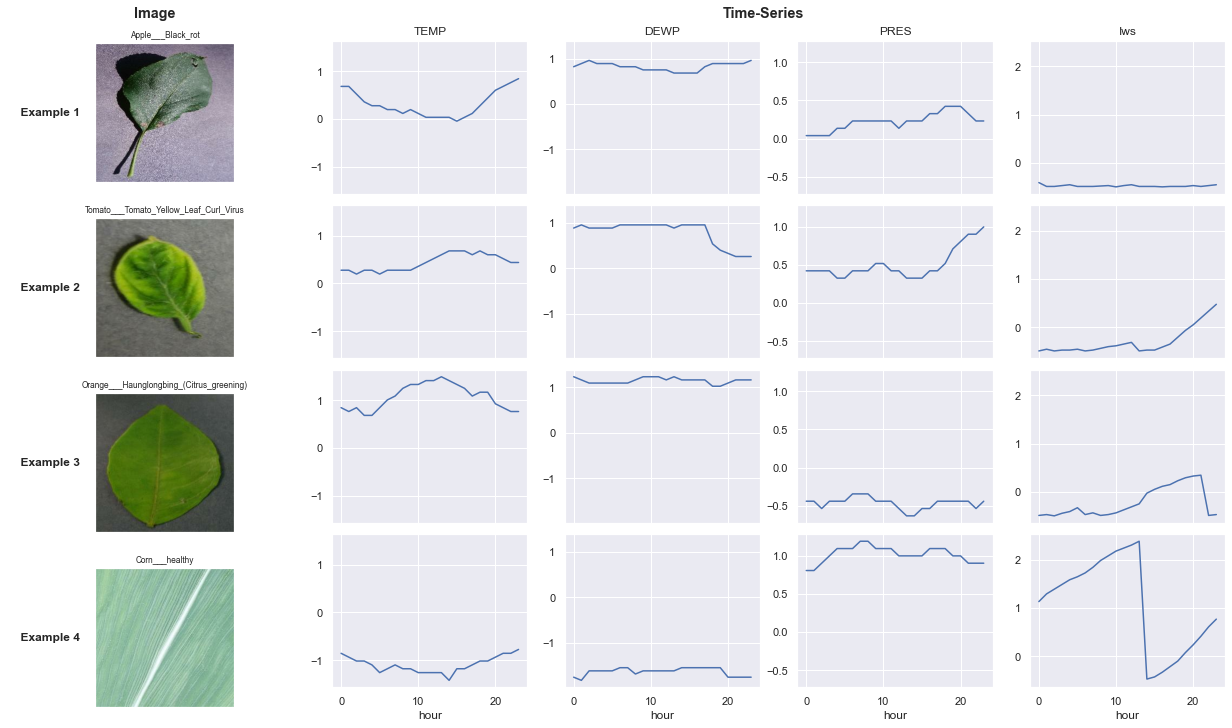

In [68]:
n = 4
fig = plt.figure(figsize=(17,10), constrained_layout=True)
subfigs = fig.subfigures(1, 2, width_ratios=[0.2, 0.8], wspace=0.1, squeeze=False)

subfig_image = subfigs[0,0]
subfig_ts = subfigs[0,1]

subfig_image.suptitle('                 Image', fontweight='bold', size='x-large')
subfig_ts.suptitle('Time-Series', fontweight='bold', size='x-large')

ax_image = subfig_image.subplots(nrows=n, ncols=1, squeeze=False)
ax_ts = subfig_ts.subplots(nrows=n, ncols=len(timeseries_features_in), sharey='col', sharex=True, squeeze=False)

for k, ((image, ts_in), (label, ts_out)) in enumerate(ds_test.take(n)):

    # Time-series.
    nrows = ts_in.shape[-1]
    for i in range(nrows):
        ax_ts[k,i].plot(ts_in[0,:,i])
        if k == 0:
            ax_ts[k,i].set_title(timeseries_features_in[i])
        if k >= n-1:
            ax_ts[k,i].set_xlabel('hour')

    # Image.
    ax_image[k,0].imshow(image[0])
    ax_image[k,0].get_xaxis().set_ticks([])
    ax_image[k,0].get_yaxis().set_ticks([])
    ax_image[k,0].set_ylabel(f"    Example {k+1}", rotation='horizontal', ha='right', va="center", fontweight='bold', size='large', labelpad=15)
    ax_image[k,0].set_title(f"{label_names[label[0].numpy()]}", size='small')

    if k >= n-1:
        break

fname = f"/Volumes/GoogleDrive/My Drive/Virginia Tech/graduate/research/thesis/images/data_fusion_example.png"
fig.savefig(fname)
print(fname)